We will nedd the following libraries:
* numpy
* pandas
* matplotlib
* pytorch
* torchtext
* transformers

Let's first check what is installed here.

In [ ]:
try:
    import numpy as np
    print(f"NumPy is installed. Version: {np.__version__}")
except ImportError:
    print("NumPy is not installed.")

print("-" * 30) # Just a separator for better readability

try:
    import pandas as pd
    print(f"Pandas is installed. Version: {pd.__version__}")
except ImportError:
    print("Pandas is not installed.")

print("-" * 30) # Just a separator for better readability

try:
    import matplotlib as plt
    print(f"Matplotlib is installed. Version: {pd.__version__}")
except ImportError:
    print("Matplotlib is not installed.")

print("-" * 30) # Just a separator for better readability
try:
    import torch
    print(f"PyTorch is installed. Version: {torch.__version__}")
    if torch.cuda.is_available():
        print("  CUDA is available (though you mentioned CPU-only).")
    else:
        print("  CUDA is NOT available (as expected for CPU-only).")
    print(f"  PyTorch device: {'cuda' if torch.cuda.is_available() else 'cpu'}")
except ImportError:
    print("PyTorch (torch) is not installed.")

print("-" * 30) # Just a separator for better readability
try:
    import torchtext
    print(f"TorchText is installed. Version: {torchtext.__version__}")
except ImportError:
    print("TorchText (torchtext) is not installed.")

print("-" * 30) # Just a separator for better readability
try:
    import transformers
    print(f"Transformers is installed. Version: {transformers.__version__}")
except ImportError:
    print("Transformers (transformers) is not installed.")

NumPy is installed. Version: 2.0.2
------------------------------
Pandas is installed. Version: 2.2.2
------------------------------
Matplotlib is installed. Version: 2.2.2
------------------------------
PyTorch is installed. Version: 2.6.0+cu124
  CUDA is NOT available (as expected for CPU-only).
  PyTorch device: cpu
------------------------------
TorchText (torchtext) is not installed.
------------------------------
Transformers is installed. Version: 4.53.0


In [ ]:
# --- EXTREMELY IMPORTANT: Restart your Colab runtime AFTER running this entire cell ---

print("--- Step 0: Initial environment check ---")
!pip list | grep -E "torch|transformers"

# 1. AGGRESSIVE UNINSTALLATION (without --force-dep)
#    We will simply list everything to uninstall.
print("\n--- Step 1: Aggressively uninstalling existing PyTorch, TorchVision, TorchAudio, and TorchText/Transformers ---")
!pip uninstall -y torch torchvision torchaudio torchtext transformers

# Verify uninstallation
print("\n--- Step 1.5: Verifying uninstallation ---")
!pip list | grep -E "torch|transformers" # Should show nothing or very little

# 2. Install PyTorch 2.3.1 (CPU-only).
#    This version is compatible with TorchText 0.18.0.
#    You can verify the exact command on https://pytorch.org/get-started/locally/ by selecting
#    PyTorch Build: stable, Your OS: Linux, Package: Pip, Compute Platform: CPU, PyTorch version: 2.3.1
print("\n--- Step 2: Installing PyTorch 2.3.1 (CPU-only) ---")
!pip install torch==2.3.1+cpu torchvision==0.18.1+cpu torchaudio==2.3.1+cpu --index-url https://download.pytorch.org/whl/cpu

# 3. Install TorchText 0.18.0.
#    This is the latest version that pip lists as available for your environment,
#    and it is compatible with PyTorch 2.3.x.
print("\n--- Step 3: Installing TorchText 0.18.0 (compatible with PyTorch 2.3.x) ---")
!pip install torchtext==0.18.0

# 4. Install Hugging Face Transformers.
#    Transformers usually works well with recent PyTorch versions, including 2.3.x.
print("\n--- Step 4: Installing Hugging Face Transformers ---")
!pip install transformers

print("\n--- Step 5: Final environment check before restart ---")
!pip list | grep -E "torch|transformers"

print("\n\n#################################################################################")
print("### IMPORTANT: PLEASE RESTART YOUR COLAB RUNTIME NOW (Runtime -> Restart runtime) ###")
print("### After restarting, run your import cell to verify.                       ###")
print("#################################################################################")

--- Step 0: Initial environment check ---
sentence-transformers                 4.1.0
torch                                 2.3.1+cpu
torchao                               0.10.0
torchaudio                            2.3.1+cpu
torchdata                             0.11.0
torchsummary                          1.5.1
torchtune                             0.6.1
torchvision                           0.18.1+cpu

--- Step 1: Aggressively uninstalling existing PyTorch, TorchVision, TorchAudio, and TorchText/Transformers ---
Found existing installation: torch 2.3.1+cpu
Uninstalling torch-2.3.1+cpu:
  Successfully uninstalled torch-2.3.1+cpu
Found existing installation: torchvision 0.18.1+cpu
Uninstalling torchvision-0.18.1+cpu:
  Successfully uninstalled torchvision-0.18.1+cpu
Found existing installation: torchaudio 2.3.1+cpu
Uninstalling torchaudio-2.3.1+cpu:
  Successfully uninstalled torchaudio-2.3.1+cpu

--- Step 1.5: Verifying uninstallation ---
sentence-transformers                 4.1.0


In [ ]:
# Standard Library Imports
import csv
import json
import math
import random
from copy import deepcopy
from itertools import chain

# Third-Party Library Imports
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn import Transformer, CrossEntropyLoss
from torch.nn.utils.rnn import pad_sequence
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.datasets import IMDB
from torchtext.vocab import Vocab, build_vocab_from_iterator
from tqdm import tqdm
from transformers import BertTokenizer, get_linear_schedule_with_warmup


# Suppress warnings (keep at the bottom or in a separate utility cell)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/datasets/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext i

DATA

The CSV datafiles were uploaded in /content/sample_data.

In [ ]:
class BERTCSVDataset(Dataset):
    def __init__(self, filename):
        self.data = pd.read_csv(filename)
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        try:

            bert_input = torch.tensor(json.loads(row['BERT Input']), dtype=torch.long)
            bert_label = torch.tensor(json.loads(row['BERT Label']), dtype=torch.long)
            segment_label = torch.tensor([int(x) for x in row['Segment Label'].split(',')], dtype=torch.long)
            is_next = torch.tensor(row['Is Next'], dtype=torch.long)
            original_text = row['Original Text']  # If you want to use it
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON for row {idx}: {e}")
            print("BERT Input:", row['BERT Input'])
            print("BERT Label:", row['BERT Label'])
            # Handle the error, e.g., by skipping this row or using default values
            return None  # or some default values

            # Tokenizing the original text with BERT
        encoded_input = self.tokenizer.encode_plus(
            original_text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        input_ids = encoded_input['input_ids'].squeeze()
        attention_mask = encoded_input['attention_mask'].squeeze()

        return(bert_input, bert_label, segment_label, is_next, input_ids, attention_mask, original_text)

In [ ]:
PAD_IDX = 0
def collate_batch(batch):


    bert_inputs_batch, bert_labels_batch, segment_labels_batch, is_nexts_batch,input_ids_batch,attention_mask_batch,original_text_battch = [], [], [], [],[],[],[]

    for bert_input, bert_label, segment_label, is_next,input_ids,attention_mask,original_text in batch:
        # Convert each sequence to a tensor and append to the respective list
        bert_inputs_batch.append(torch.tensor(bert_input, dtype=torch.long))
        bert_labels_batch.append(torch.tensor(bert_label, dtype=torch.long))
        segment_labels_batch.append(torch.tensor(segment_label, dtype=torch.long))
        is_nexts_batch.append(is_next)
        input_ids_batch.append(input_ids)
        attention_mask_batch.append(attention_mask)
        original_text_battch.append(original_text)

    # Pad the sequences in the batch
    bert_inputs_final = pad_sequence(bert_inputs_batch, padding_value=PAD_IDX, batch_first=False)
    bert_labels_final = pad_sequence(bert_labels_batch, padding_value=PAD_IDX, batch_first=False)
    segment_labels_final = pad_sequence(segment_labels_batch, padding_value=PAD_IDX, batch_first=False)
    is_nexts_batch = torch.tensor(is_nexts_batch, dtype=torch.long)

    return bert_inputs_final, bert_labels_final, segment_labels_final, is_nexts_batch

In [ ]:
BATCH_SIZE = 2

train_dataset_path = '/content/sample_data/bert_train_data_sampled.csv'
test_dataset_path = '/content/sample_data/bert_test_data_sampled.csv'

train_dataset = BERTCSVDataset(train_dataset_path)
test_dataset = BERTCSVDataset(test_dataset_path)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)

## Model Creation
In BERT, positional embedding, token embedding, and segment embedding are three types of embeddings used to represent the input tokens in the model.

In [ ]:
EMBEDDING_DIM = 10

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

# Define the PositionalEncoding class as a PyTorch module for adding positional information to token embeddings
class PositionalEncoding(nn.Module):
    def __init__(self, emb_size: int, dropout: float, maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        # Create a positional encoding matrix as per the Transformer paper's formula
        den = torch.exp(- torch.arange(0, emb_size, 2) * math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: torch.Tensor):
        # Apply the positional encodings to the input token embeddings

        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])

In [ ]:
class BERTEmbedding (nn.Module):

    def __init__(self, vocab_size, emb_size ,dropout=0.1,train=True):

        super().__init__()

        self.token_embedding = TokenEmbedding( vocab_size,emb_size )
        self.positional_encoding = PositionalEncoding(emb_size,dropout)
        self.segment_embedding = nn.Embedding(3, emb_size)
        self.dropout = torch.nn.Dropout(p=dropout)

    def forward(self, bert_inputs, segment_labels=False):
        my_embeddings=self.token_embedding(bert_inputs)
        if self.train:
          x = self.dropout(my_embeddings + self.positional_encoding(my_embeddings) + self.segment_embedding(segment_labels))
        else:
          x = my_embeddings + self.positional_encoding(my_embeddings)

        return x

Define a complete BERT model with the following key components:

1. Initialization: The `BERT` class is defined as a subclass of `torch.nn.Module`. It initializes the BERT model with parameters such as vocabulary size, model dimension, number of layers, number of attention heads, and dropout rate.

2. Embedding Layer: The BERT model includes an embedding layer that combines token embeddings and segment embeddings using the `BERTEmbedding` class.

3. Transformer Encoder: Transformer Encoder layers are used to encode the input embeddings. The number of layers, attention heads, dropout rate, and model dimension are specified based on the defined parameters.

4. Next Sentence Prediction: The model has a linear layer for Next Sentence Prediction. It takes the output from the Transformer encoder and predicts the relationship between two consecutive sentences, classifying them into two classes.

5. Masked Language Modeling: The model also includes a linear layer for Masked Language Modeling. It predicts the masked tokens in the input sequence by taking the output from the Transformer encoder and making predictions across the vocabulary.

6. Forward Pass: The `forward` method defines the forward pass of the BERT model. It takes input tokens (`bert_inputs`) and segment labels (`segment_labels`) and returns predictions for Next Sentence Prediction and Masked Language Modeling tasks.

In [ ]:
VOCAB_SIZE=147161
batch = 2
count = 0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load sample batches from dataloader
for batch in train_dataloader:
    bert_inputs, bert_labels, segment_labels, is_nexts = [b.to(device) for b in batch]
    count += 1
    if count == 5:
        break

In [ ]:
bert_inputs.shape

torch.Size([22, 2])

In [ ]:
#pick a sample input
bert_inputs[:,0]

tensor([   1, 3033,   15, 1940,   23,  660, 2517,    3,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    3,
        7216,    7,    5,  101, 5794,  411,   31,  293,  135,    7,    3,    3,
         187,   10,  426, 3423,  165,    7,   15,    9,    3,   10,   61,   29,
        1550,    3,   73, 6537,  411,    3,    3, 2280,   58,    2,    0,    0])

In [ ]:
segment_labels.shape

torch.Size([72, 2])

In [ ]:
segment_labels[:,0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0])

In [ ]:
# Instantiate the TokenEmbedding
token_embedding = TokenEmbedding(VOCAB_SIZE, emb_size=EMBEDDING_DIM )

# Get the token embeddings for a sample input
t_embeddings = token_embedding(bert_inputs)
#Each token is transformed into a tensor of size emb_size
print(f"Dimensions of token embeddings: {t_embeddings.size()}") # Expected: (sequence_length, batch_size, EMBEDDING_DIM)
#Check the embedded vectors for first 3 tokens of the first sample in the batch
# you get embeddings[i,0,:] where i refers to the i'th token of the first sample in the batch (b=0)
for i in range(3):
    print(f"Token Embeddings for the {i}th token of the first sample: {t_embeddings[i,0,:]}")

Dimensions of token embeddings: torch.Size([72, 2, 10])
Token Embeddings for the 0th token of the first sample: tensor([ 1.5384, -8.1250, -1.5859, -1.5011,  0.9171, -0.2698, -2.4455, -0.3522,
        -1.1115,  1.9573], grad_fn=<SliceBackward0>)
Token Embeddings for the 1th token of the first sample: tensor([ 2.6097,  2.0662, -5.2810, -0.1401, -0.4262,  2.7150, -3.9778, -2.1307,
         0.1395, -1.3792], grad_fn=<SliceBackward0>)
Token Embeddings for the 2th token of the first sample: tensor([ 4.7348,  4.7619,  8.4431,  1.3590,  3.0379, -2.8740,  5.4607, -3.8453,
        -7.5723,  5.5518], grad_fn=<SliceBackward0>)


In [ ]:
positional_encoding = PositionalEncoding(emb_size=EMBEDDING_DIM,dropout=0)

# Apply positional encoding to token embeddings
p_embedding = positional_encoding(t_embeddings)

print(f"Dimensions of positionally encoded tokens: {p_embedding.size()}")# Expected: (sequence_length, batch_size, EMBEDDING_DIM)
#Check the positional encoded vectors for first 3 tokens of the first sample in the batch
# you get encoded_tokens[i,0,:] where i refers to the i'th token of the first sample(b=0) in the batch
for i in range(3):
    print(f"Positional Embeddings for the {i}th token of the first sample: {p_embedding[i,0,:]}")

Dimensions of positionally encoded tokens: torch.Size([72, 2, 10])
Positional Embeddings for the 0th token of the first sample: tensor([ 1.5384, -7.1250, -1.5859, -0.5011,  0.9171,  0.7302, -2.4455,  0.6478,
        -1.1115,  2.9573], grad_fn=<SliceBackward0>)
Positional Embeddings for the 1th token of the first sample: tensor([ 3.4512,  2.6065, -5.1232,  0.8474, -0.4011,  3.7147, -3.9738, -1.1307,
         0.1401, -0.3792], grad_fn=<SliceBackward0>)
Positional Embeddings for the 2th token of the first sample: tensor([ 5.6441,  4.3457,  8.7548,  2.3091,  3.0881, -1.8752,  5.4687, -2.8453,
        -7.5711,  6.5518], grad_fn=<SliceBackward0>)


In [ ]:
segment_embedding = nn.Embedding(3, EMBEDDING_DIM)
s_embedding = segment_embedding(segment_labels)
print(f"Dimensions of segment embedding: {s_embedding.size()}")# Expected: (sequence_length, batch_size, EMBEDDING_DIM)
#Check the Segment Embedding vectors for first 3 tokens of the first sample in the batch
# you get segment_embedded[i,0,:] where i refers to the i'th token of the first sample(b=0) in the batch
for i in range(3):
    print(f"Segment Embeddings for the {i}th token of the first sample: {s_embedding[i,0,:]}")

Dimensions of segment embedding: torch.Size([72, 2, 10])
Segment Embeddings for the 0th token of the first sample: tensor([-0.6478, -0.2803, -0.9814, -0.6833, -0.3031,  1.5178, -1.7818,  0.6299,
         0.6027, -0.4947], grad_fn=<SliceBackward0>)
Segment Embeddings for the 1th token of the first sample: tensor([-0.6478, -0.2803, -0.9814, -0.6833, -0.3031,  1.5178, -1.7818,  0.6299,
         0.6027, -0.4947], grad_fn=<SliceBackward0>)
Segment Embeddings for the 2th token of the first sample: tensor([-0.6478, -0.2803, -0.9814, -0.6833, -0.3031,  1.5178, -1.7818,  0.6299,
         0.6027, -0.4947], grad_fn=<SliceBackward0>)


In [ ]:
#Create the combined embedding vectors
bert_embeddings = t_embeddings + p_embedding + s_embedding
print(f"Dimensions of token + position + segment encoded tokens: {bert_embeddings.size()}")
#Check the BERT Embedding vectors for first 3 tokens of the first sample in the batch
# you get bert_embeddings[i,0,:] where i refers to the i'th token of the first sample(b=0) in the batch
for i in range(3):
    print(f"BERT_Embedding for {i}th token: {bert_embeddings[i,0,:]}")

Dimensions of token + position + segment encoded tokens: torch.Size([72, 2, 10])
BERT_Embedding for 0th token: tensor([  2.4290, -15.5302,  -4.1533,  -2.6855,   1.5310,   1.9782,  -6.6728,
          0.9254,  -1.6202,   4.4199], grad_fn=<SliceBackward0>)
BERT_Embedding for 1th token: tensor([  5.4131,   4.3923, -11.3857,   0.0240,  -1.1305,   7.9475,  -9.7333,
         -2.6316,   0.8824,  -2.2530], grad_fn=<SliceBackward0>)
BERT_Embedding for 2th token: tensor([  9.7311,   8.8273,  16.2165,   2.9848,   5.8229,  -3.2314,   9.1476,
         -6.0607, -14.5406,  11.6088], grad_fn=<SliceBackward0>)


In [ ]:
class BERT(torch.nn.Module):

    def __init__(self, vocab_size, d_model=768, n_layers=12, heads=12, dropout=0.1):
        """
        vocab_size: The size of the vocabulary.
        d_model: The size of the embeddings (hidden size).
        n_layers: The number of Transformer layers.
        heads: The number of attention heads in each Transformer layer.
        dropout: The dropout rate applied to embeddings and Transformer layers.
        """
        super().__init__()
        self.d_model = d_model
        self.n_layers = n_layers
        self.heads = heads

        # Embedding layer that combines token embeddings and segment embeddings
        self.bert_embedding = BERTEmbedding(vocab_size, d_model, dropout)

        # Transformer Encoder layers
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=heads, dropout=dropout,batch_first=False)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=n_layers)

        # Linear layer for Next Sentence Prediction
        self.nextsentenceprediction = nn.Linear(d_model, 2)

        # Linear layer for Masked Language Modeling
        self.masked_language = nn.Linear(d_model, vocab_size)

    def forward(self, bert_inputs, segment_labels):
        """
        bert_inputs: Input tokens.
        segment_labels: Segment IDs for distinguishing different segments in the input.
        mask: Attention mask to prevent attention to padding tokens.

        return: Predictions for next sentence task and masked language modeling task.
        """

        padding_mask = (bert_inputs == PAD_IDX).transpose(0, 1)
        # Generate embeddings from input tokens and segment labels
        my_bert_embedding = self.bert_embedding(bert_inputs, segment_labels)

        # Pass embeddings through the Transformer encoder
        transformer_encoder_output = self.transformer_encoder(my_bert_embedding,src_key_padding_mask=padding_mask)


        next_sentence_prediction = self.nextsentenceprediction(transformer_encoder_output[ 0,:])


        # Masked Language Modeling: Predict all tokens in the sequence
        masked_language = self.masked_language(transformer_encoder_output)

        return  next_sentence_prediction, masked_language

In [ ]:
EMBEDDING_DIM = 10

# Define parameters
vocab_size = 147161  # Replace VOCAB_SIZE with your vocabulary size
d_model = EMBEDDING_DIM  # Replace EMBEDDING_DIM with your embedding dimension
n_layers = 2  # Number of Transformer layers
initial_heads = 12 # Initial number of attention heads
initial_heads = 2
# Ensure the number of heads is a factor of the embedding dimension
heads = initial_heads - d_model % initial_heads

dropout = 0.1  # Dropout rate

# Create an instance of the BERT model
model = BERT(vocab_size, d_model, n_layers, heads, dropout)

In [ ]:
padding_mask = (bert_inputs == PAD_IDX).transpose(0, 1)
padding_mask.shape

torch.Size([2, 72])

In [ ]:
encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=heads, dropout=dropout,batch_first=False)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
# Pass embeddings through the Transformer encoder
transformer_encoder_output = transformer_encoder(bert_embeddings,src_key_padding_mask=padding_mask)
transformer_encoder_output.shape

torch.Size([72, 2, 10])

In [ ]:
nextsentenceprediction = nn.Linear(d_model, 2)
nsp = nextsentenceprediction(transformer_encoder_output[ 0,:])
#logits for NSP task
print(f"NSP Output Shape: {nsp.shape}")  # Expected shape: (batch_size, 2)

NSP Output Shape: torch.Size([2, 2])


In [ ]:
masked_language = nn.Linear(d_model, vocab_size)
# Masked Language Modeling: Predict all tokens in the sequence
mlm = masked_language(transformer_encoder_output)
#logits for MLM task
print(f"MLM Output Shape: {mlm.shape}")  # Expected shape: (seq_length, batch_size, vocab_size)

MLM Output Shape: torch.Size([72, 2, 147161])


## Evaluation

After creating the BERT model, the next step is training and evaluating its performance. To facilitate this, an `evaluate` function is defined with the following steps:

1. Loss Function: The CrossEntropyLoss function is defined to calculate the loss between predicted and actual values.

2. Function Arguments: The function takes arguments including the dataloader, model, loss function, and device.

3. Evaluation Mode: The BERT model is put into evaluation mode using `model.eval()`, disabling dropout and training-specific behaviors. Variables are initialized to track the total loss, total next sentence loss, total mask loss, and total number of batches.

4. Evaluation Loop: The function iterates through the batches in the provided dataloader.

5. Forward Pass: A forward pass is performed with the BERT model to obtain predictions for the next sentence and masked language tasks.

6. Loss Calculation: The losses for the next sentence and masked language tasks are calculated, and then summed up to obtain the total loss for the batch.

7. Average Loss Calculation: The average loss, average next sentence loss, and average mask loss are calculated by dividing the total losses by the total number of batches.


The `evaluate` function is used not only for evaluating the BERT model's performance but also during the training phase to assess the model's progress.

In [ ]:
PAD_IDX=0
loss_fn_mlm = nn.CrossEntropyLoss(ignore_index=PAD_IDX)# The loss function must ignore PAD tokens and only calculates loss for the masked tokens
loss_fn_nsp = nn.CrossEntropyLoss()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cpu')

In [ ]:
def evaluate(dataloader=test_dataloader, model=model, loss_fn_mlm=loss_fn_mlm, loss_fn_nsp=loss_fn_nsp, device=device):
    model.eval()  # Turn off dropout and other training-specific behaviors

    total_loss = 0
    total_next_sentence_loss = 0
    total_mask_loss = 0
    total_batches = 0
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        for batch in dataloader:
            bert_inputs, bert_labels, segment_labels, is_nexts = [b.to(device) for b in batch]

            # Forward pass
            next_sentence_prediction, masked_language = model(bert_inputs, segment_labels)

            # Calculate loss for next sentence prediction
            # Ensure is_nexts is of the correct shape for CrossEntropyLoss
            next_loss = loss_fn_nsp(next_sentence_prediction, is_nexts.view(-1))

            # Calculate loss for predicting masked tokens
            # Flatten both masked_language predictions and bert_labels to match CrossEntropyLoss input requirements
            mask_loss = loss_fn_mlm(masked_language.view(-1, masked_language.size(-1)), bert_labels.view(-1))

            # Sum up the two losses
            loss = next_loss + mask_loss
            if torch.isnan(loss):
                continue
            else:
                total_loss += loss.item()
                total_next_sentence_loss += next_loss.item()
                total_mask_loss += mask_loss.item()
                total_batches += 1

    avg_loss = total_loss / (total_batches + 1)
    avg_next_sentence_loss = total_next_sentence_loss / (total_batches + 1)
    avg_mask_loss = total_mask_loss / (total_batches + 1)

    print(f"Average Loss: {avg_loss:.4f}, Average Next Sentence Loss: {avg_next_sentence_loss:.4f}, Average Mask Loss: {avg_mask_loss:.4f}")
    return avg_loss

## Training
The training process for the BERT model involves the following steps:

1. Optimizer Definition: Before training starts, an optimizer is defined for training the BERT model. In this case, the Adam optimizer is used.

2. Training Loop: Within each epoch, the training data is iterated through in batches.

3. Forward Pass: For each batch, a forward pass is performed, where the BERT model predicts the next sentence and masked language tasks.

4. Loss Calculation and Parameter Update: The loss is calculated based on the predicted and actual values. The model's parameters are then updated through backpropagation and gradient clipping.

5. Epoch Evaluation: After each epoch, the average training loss is printed. The model's performance on the test set is evaluated. Additionally, the model is saved after each epoch.

These steps are repeated for multiple epochs to train the BERT model and monitor its progress over time.

**NOTE: The current DataLoader is quite huge, and it will take several hours for the model to train with such a huge dataset.**

In [ ]:
# Define the optimizer
optimizer = Adam(model.parameters(), lr=1e-4, weight_decay=0.01, betas=(0.9, 0.999))

# Training loop setup
num_epochs = 1
total_steps = num_epochs * len(train_dataloader)

# Define the number of warmup steps, e.g., 10% of total
warmup_steps = int(total_steps * 0.1)

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                             num_warmup_steps=warmup_steps,
                                             num_training_steps=total_steps)

# Lists to store losses for plotting
train_losses = []
eval_losses = []

# Calculate the interval for printing (e.g., every 10% of steps)
print_interval = len(train_dataloader) // 10
if print_interval == 0: # Ensure at least one print if dataloader is very small
    print_interval = 1


for epoch in tqdm(range(num_epochs), desc="Training Epochs"):
    model.train()
    total_loss = 0
    epoch_start_time = pd.Timestamp.now() # To track epoch duration

    # The key change is here: `disable=True` for the INNER tqdm
    # This will prevent the step-by-step progress bar output
    for step, batch in enumerate(tqdm(train_dataloader, desc=f"Epoch {epoch + 1} Batch", disable=True)):
        # Move batch to device
        bert_inputs, bert_labels, segment_labels, is_nexts = [b.to(device) for b in batch]

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        next_sentence_prediction, masked_language = model(bert_inputs, segment_labels)

        # Calculate losses
        next_loss = loss_fn_nsp(next_sentence_prediction, is_nexts)
        mask_loss = loss_fn_mlm(masked_language.view(-1, masked_language.size(-1)), bert_labels.view(-1))
        loss = next_loss + mask_loss

        # Accumulate loss
        current_loss_item = loss.item()
        if not torch.isnan(loss): # Only add if not NaN
            total_loss += current_loss_item

        # Backward pass and optimize
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()  # Update the learning rate

        # Print update every 10% of steps
        if (step + 1) % print_interval == 0 or (step + 1) == len(train_dataloader):
            current_lr = scheduler.get_last_lr()[0]
            # Use `\r` to overwrite the current line for frequent updates within one line,
            # or just `print` for new lines. For 10% updates, `print` is fine.
            print(f"  Epoch {epoch + 1}, Step {step + 1}/{len(train_dataloader)}: "
                  f"Loss: {current_loss_item:.4f}, LR: {current_lr:.6f}")


    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    epoch_end_time = pd.Timestamp.now()
    epoch_duration = epoch_end_time - epoch_start_time
    print(f"Epoch {epoch+1} - Average training loss: {avg_train_loss:.4f} "
          f"| Epoch Duration: {epoch_duration}")

    # Evaluation after each epoch
    print(f"Starting evaluation for Epoch {epoch+1}...")
    eval_loss = evaluate(test_dataloader, model, loss_fn_nsp, loss_fn_mlm, device)
    eval_losses.append(eval_loss)
    print(f"Epoch {epoch+1} - Average evaluation loss: {eval_loss:.4f}")


Training Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

  Epoch 1, Step 500/5000: Loss: 12.5769, LR: 0.000100
  Epoch 1, Step 1000/5000: Loss: 12.4643, LR: 0.000089
  Epoch 1, Step 1500/5000: Loss: 12.4313, LR: 0.000078
  Epoch 1, Step 2000/5000: Loss: 12.0297, LR: 0.000067
  Epoch 1, Step 2500/5000: Loss: 12.6387, LR: 0.000056
  Epoch 1, Step 3000/5000: Loss: 12.2778, LR: 0.000044
  Epoch 1, Step 3500/5000: Loss: 12.1270, LR: 0.000033
  Epoch 1, Step 4000/5000: Loss: 12.0945, LR: 0.000022
  Epoch 1, Step 4500/5000: Loss: 12.3130, LR: 0.000011
  Epoch 1, Step 5000/5000: Loss: 12.3767, LR: 0.000000
Epoch 1 - Average training loss: 12.3292 | Epoch Duration: 0 days 00:38:40.666896
Starting evaluation for Epoch 1...


Training Epochs: 100%|██████████| 1/1 [46:59<00:00, 2819.31s/it]

Average Loss: 12.7899, Average Next Sentence Loss: 0.7254, Average Mask Loss: 12.0645
Epoch 1 - Average evaluation loss: 12.7899


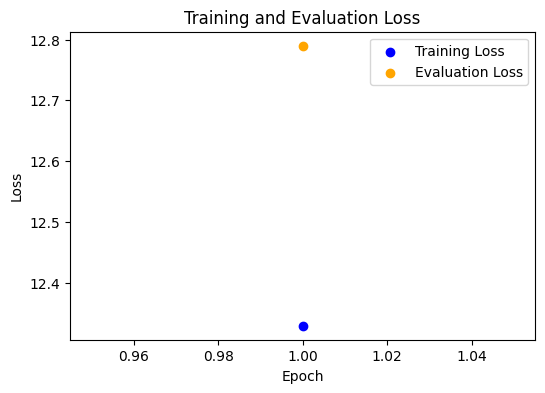

In [26]:
# Plotting the loss values
plt.figure(figsize=(6, 4))
plt.scatter(range(1,num_epochs+1), train_losses, label="Training Loss", color='blue')
plt.scatter(range(1,num_epochs+1), eval_losses, label="Evaluation Loss", color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.show()

Inference

In [27]:
# Initialize the tokenizer with the BERT model's vocabulary
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model.eval()

def predict_nsp(sentence1, sentence2, model, tokenizer):
    # Tokenize sentences with special tokens
    tokens = tokenizer.encode_plus(sentence1, sentence2, return_tensors="pt")
    tokens_tensor = tokens["input_ids"].to(device)
    segment_tensor = tokens["token_type_ids"].to(device)

    # Predict
    with torch.no_grad():
        # Assuming the model returns NSP predictions first
        nsp_prediction, _ = model(tokens_tensor, segment_tensor)
        # Select the first element (first sequence) of the logits tensor
        first_logits = nsp_prediction[0].unsqueeze(0)  # Adds an extra dimension, making it [1, 2]
        logits = torch.softmax(first_logits, dim=1)
        prediction = torch.argmax(logits, dim=1).item()

    # Interpret the prediction
    return "Second sentence follows the first" if prediction == 1 else "Second sentence does not follow the first"

# Example usage
sentence1 = "The cat sat on the mat."
sentence2 = "It was a sunny day"

print(predict_nsp(sentence1, sentence2, model, tokenizer))

Second sentence follows the first


## Next Sentence Prediction (NSP) with BERT

1. **Load the BERT pretrained model**: Import `BertForPreTraining` and `BertTokenizer` from `transformers`, and load the 'bert-base-uncased' pretrained model and tokenizer.
2. **Prepare text input**: Encode a pair of sentences using the loaded tokenizer.
3. **Perform NSP**: Pass the encoded input through the model and interpret the `seq_relationship_logits` to determine if the model predicts the sentences as consecutive.

In [28]:
def predict_mlm(sentence, model, tokenizer):
    # Tokenize the input sentence and convert to token IDs, including special tokens
    inputs = tokenizer(sentence, return_tensors="pt")
    tokens_tensor = inputs.input_ids

    # Create dummy segment labels filled with zeros, assuming it's needed by your model
    segment_labels = torch.zeros_like(tokens_tensor)

    with torch.no_grad():
        # Forward pass through the model, now correctly handling the output tuple
        output_tuple = model(tokens_tensor, segment_labels)

        # Assuming the second element of the tuple contains the MLM logits
        predictions = output_tuple[1]  # Adjusted based on your model's output

        # Identify the position of the [MASK] token
        mask_token_index = (tokens_tensor == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

        # Get the predicted index for the [MASK] token from the MLM logits
        predicted_index = torch.argmax(predictions[0, mask_token_index.item(), :], dim=-1)
        predicted_token = tokenizer.convert_ids_to_tokens([predicted_index.item()])[0]

        # Replace [MASK] in the original sentence with the predicted token
        predicted_sentence = sentence.replace(tokenizer.mask_token, predicted_token, 1)

    return predicted_sentence


# Example usage
sentence = "The cat sat on the [MASK]."
print(predict_mlm(sentence, model, tokenizer))

The cat sat on the [unused5].


## Masked Language Modeling (MLM) with BERT
1. **Initialize the model and tokenizer**:
   Load `BertForPreTraining` and `BertTokenizer` from the `transformers` library using the 'bert-base-uncased' model.
2. **Prepare the masked sentence**:
   Write a sentence and replace one word with `[MASK]`. For example, "The capital of France is [MASK]."
3. **Tokenize and predict**:
   Tokenize the masked sentence with `BertTokenizer.` Then, input it to `BertForPreTraining` and use the `prediction_logits` to find the most probable token that fits the mask.
4. **Display the prediction**:
   Convert the predicted token ID back to a token string and print out the predicted word.


In [30]:
from transformers import BertForPreTraining, BertTokenizer
import torch

# Load pretrained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pretrained model (weights)
model = BertForPreTraining.from_pretrained('bert-base-uncased')
# Prepare text pair for NSP
text_1 = "The cat sat on the mat"
text_2 = "It was a sunny day"
# Encode text
inputs = tokenizer(text_1, text_2, return_tensors="pt")

# Predict
with torch.no_grad():
    outputs = model(**inputs, next_sentence_label=torch.LongTensor([1]))
    nsp_logits = outputs.seq_relationship_logits

# Interpret the result for NSP
if torch.argmax(nsp_logits, dim=-1).item() == 0:
    print("The model thinks these sentences are NOT consecutive.")
else:
    print("The model thinks these sentences are consecutive.")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The model thinks these sentences are NOT consecutive.


In [31]:
from transformers import BertForPreTraining, BertTokenizer
import torch

# Load pretrained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pretrained model (weights)
model = BertForPreTraining.from_pretrained('bert-base-uncased')

# Prepare text with masked token
masked_text = "The capital of France is [MASK]."
# Tokenize and prepare for the model: Convert to tokens and add special tokens
input_ids = tokenizer(masked_text, return_tensors="pt")["input_ids"]

# Predict all tokens
with torch.no_grad():
    outputs = model(input_ids=input_ids)
    predictions = outputs.prediction_logits

# Confirm we were able to predict 'Paris' as the masked token
predicted_index = torch.argmax(predictions[0, input_ids[0] == tokenizer.mask_token_id]).item()
predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])

print(f"Predicted token: {predicted_token}")

Predicted token: ['paris']
